# SETUP MITO CODEBASE

This notebook follows the installation instructions from the [MITO README](https://github.com/signalkinetics/MITO_Codebase).

**Prerequisites:**
- Ubuntu 22.04 (or similar Linux environment) 
- Python 3.10
- For Colab: Run the setup cells below
- For local use: Follow manual installation steps in the README

In [ ]:
# Mount Google Drive to access your data folder
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive mounted successfully!")
print("Your data should be at: /content/drive/MyDrive/Fall_2025/MAS.361/data")

In [ ]:
# Clone the MITO repository (skip if already cloned)
import os
if not os.path.exists('/content/MITO_Codebase'):
    !git clone https://github.com/signalkinetics/MITO_Codebase.git
    print("MITO_Codebase cloned successfully!")
else:
    print("MITO_Codebase already exists, skipping clone.")

Cloning into 'MITO_Codebase'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 75 (delta 16), reused 63 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 216.43 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
# Change to MITO_Codebase directory and install dependencies
%cd /content/MITO_Codebase/
import sys
import os

# Add src to Python path
sys.path.insert(0, './src')

# Install system dependencies required for building extensions
!apt-get update && apt-get install -y python3-dev libboost-all-dev

# Install pybind11 which is required for the C++ compilation
!pip install pybind11

# Run setup script with --install flag
# This will install requirements based on params.json settings
!python3 setup.py --install

print("\nSetup complete! MITO dependencies installed.")

/content/MITO_Codebase
Hit:1 https://cli.github.com/packages stable InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,532 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,482 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,290 kB]
Hit:13 https://ppa.

In [ ]:
# Download MITO Dataset from Hugging Face (Optional - skip if you only want to process your own data)
# Follow these steps:
# 1. Login to Hugging Face (you'll need a token)
# 2. Clone the dataset repository

# Uncomment below to download the full MITO dataset
# !huggingface-cli login
# !git clone https://huggingface.co/datasets/SignalKinetics/MITO_Dataset

print("Note: Downloading the full MITO dataset is optional.")
print("Skip this if you only want to process your IWR1443 data.")

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `mito-dataset` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-

#01_dataset_visualization.ipynb

# Welcome to the MITO Dataset!

In this tutorial, we will show:
1. How to load mmWave images within the dataset
2. How to visualize mmWave images

***Before beginning this tutorial, please follow the installation steps listed in the README.***


In [ ]:
# Import MITO utilities
import sys
import os

# For Colab
if '/content/MITO_Codebase/src' not in sys.path:
    sys.path.insert(0, '/content/MITO_Codebase/src')

# For local use - adjust path to your MITO_Codebase location
# sys.path.insert(0, '/path/to/MITO_Codebase/src')

from utils import utilities
from utils.object_information import ObjectInformation, ObjectAttributes, ExperimentAttributes
from utils.generic_loader import GenericLoader
from utils.visualization import Visualizer

print("MITO utilities imported successfully!")
print(f"Root path: {utilities.get_root_path()}")

## Configure Data Path for Google Drive

Since your IWR1443 data is in Google Drive (not in the MITO_Codebase), we need to update MITO's configuration to point to the correct location.

**Important:** MITO's `utilities.get_root_path()` returns `/content/MITO_Codebase/`, and it combines this with `params['processing']['path_to_data']`. So we need to use a **relative path** that navigates from MITO_Codebase to your data folder.

**Your folder structure in Google Drive:**
```
MyDrive/
  └── Fall_2025/
      └── MAS.361/
          └── data/
              └── 000_test_object/
                  └── robot_collected/
                      └── 0_0_0/
                          └── exp1/
                              └── los/
                                  └── unprocessed/
                                      └── radars/
                                          └── radar_data/
                                              ├── adc_data{timestamp}.bin
                                              └── metadata_{timestamp}.json
```

In [ ]:
# Configure data path to point to your Google Drive
# This tells MITO where to find your IWR1443 data
import json

# IMPORTANT: MITO combines get_root_path() with params['path_to_data']
# get_root_path() returns: /content/MITO_Codebase/
# So we need a RELATIVE path from MITO_Codebase to your data folder

# Absolute path to your data in Google Drive
data_path_absolute = "/content/drive/MyDrive/Fall_2025/MAS.361/data"

# Relative path from /content/MITO_Codebase/ to your data
# This navigates: ../drive/MyDrive/Fall_2025/MAS.361/data
data_path_relative = "../drive/MyDrive/Fall_2025/MAS.361/data"

# Verify the absolute path exists
if os.path.exists(data_path_absolute):
    print(f"✓ Data folder found: {data_path_absolute}")
    
    # List contents to verify
    contents = os.listdir(data_path_absolute)
    print(f"  Contents: {contents}")
else:
    print(f"✗ Data folder NOT found at: {data_path_absolute}")
    print("  Please verify your Google Drive folder structure")

# Update params.json to use the RELATIVE path
# MITO will combine: /content/MITO_Codebase/ + ../drive/MyDrive/Fall_2025/MAS.361/data
# Which resolves to: /content/drive/MyDrive/Fall_2025/MAS.361/data
params_file = '/content/MITO_Codebase/src/utils/params.json'
with open(params_file, 'r') as f:
    params = json.load(f)

# Set the RELATIVE path
params['processing']['path_to_data'] = data_path_relative

# Save updated params
with open(params_file, 'w') as f:
    json.dump(params, f, indent=4)

print(f"\n✓ Updated params.json with relative path: {data_path_relative}")
print(f"  This resolves to: {data_path_absolute}")

# Verify the combined path works
from utils import utilities
combined_path = os.path.join(utilities.get_root_path(), data_path_relative)
combined_path_normalized = os.path.normpath(combined_path)
print(f"\n✓ MITO will use: {combined_path_normalized}")
if os.path.exists(combined_path_normalized):
    print(f"  ✓ Path is valid and accessible!")
else:
    print(f"  ✗ Warning: Combined path not found")

### Troubleshooting Google Drive Access

If you get "file not found" errors:

1. **Verify Google Drive mount:**
   - Make sure you authorized access when prompted
   - Check that `/content/drive/MyDrive` exists

2. **Check your folder structure:**
   ```python
   # Run this to see your Google Drive contents
   !ls -la /content/drive/MyDrive/Fall_2025/MAS.361/
   ```

3. **Adjust the path if needed:**
   - If your data folder is in a different location, update both `data_path_absolute` and `data_path_relative` in the cell above
   - The relative path should navigate from `/content/MITO_Codebase/` to your data folder
   - Example paths:
     - If data is at `/content/drive/MyDrive/data`, use relative: `../drive/MyDrive/data`
     - If data is at `/content/drive/MyDrive/MAS.361/data`, use relative: `../drive/MyDrive/MAS.361/data`

4. **Verify path resolution:**
   ```python
   import os
   from utils import utilities
   
   # Check what MITO will actually use
   root = utilities.get_root_path()
   relative = utilities.load_param_json()['processing']['path_to_data']
   combined = os.path.normpath(os.path.join(root, relative))
   
   print(f"Root: {root}")
   print(f"Relative: {relative}")
   print(f"Combined: {combined}")
   print(f"Exists: {os.path.exists(combined)}")
   ```

## Processing New SAR Images

In [ ]:
## Processing IWR1443 Radar Data

This section shows how to process raw radar .bin files collected with the IWR1443 radar into SAR images.

Your data should be in the MITO folder structure:
```
data/
  └── {obj_id}_{obj_name}/
      └── robot_collected/
          └── {x}_{y}_{z}/
              └── exp{N}/
                  └── los/
                      └── unprocessed/
                          └── radars/
                              └── radar_data/
                                  ├── adc_data{timestamp}.bin
                                  └── metadata_{timestamp}.json
```

Note: Each capture creates a matched pair of .bin and metadata files with the same timestamp.

In [ ]:
# Import required modules for processing IWR1443 data
from data_processing.image_processor import ImageProcessor
import numpy as np
import json
import os

print("Image processor imported successfully!")
print(f"Using CUDA: {utilities.load_param_json()['processing']['use_cuda']}")
print(f"Using interpolated processing: {utilities.load_param_json()['processing']['use_interpolated_processing']}")

In [ ]:
########################
# Step 1: Define your IWR1443 radar data parameters
obj_id = '000'  # Your object ID
obj_name = 'test_object'  # Your object name
x_angle = 0  # X rotation angle
y_angle = 0  # Y rotation angle
z_angle = 0  # Z rotation angle
exp_num = 1  # Experiment number
is_los = True  # Line-of-sight or non-line-of-sight
radar_type = '77_ghz'  # Radar type (we'll use this label for IWR1443)
########################

print(f"Processing: {obj_id}_{obj_name}")
print(f"Angles: ({x_angle}, {y_angle}, {z_angle})")
print(f"Experiment: exp{exp_num}")
print(f"Type: {'los' if is_los else 'nlos'}")

# Verify data path is configured correctly
current_data_path = utilities.load_param_json()['processing']['path_to_data']
print(f"\n✓ Data path: {current_data_path}")

# Expected full path to your data
expected_path = os.path.join(
    current_data_path,
    f"{obj_id}_{obj_name}",
    "robot_collected",
    f"{x_angle}_{y_angle}_{z_angle}",
    f"exp{exp_num}",
    "los" if is_los else "nlos",
    "unprocessed",
    "radars",
    "radar_data"
)
print(f"  Looking for data at: {expected_path}")

if os.path.exists(expected_path):
    print(f"  ✓ Data folder exists!")
else:
    print(f"  ✗ Data folder not found. Please check your Google Drive structure.")

In [ ]:
# Step 2: Load the raw radar data manually (don't use MITO's path functions)
# We'll construct the absolute path directly to Google Drive

# Get the absolute path to radar_data folder
angles = (x_angle, y_angle, z_angle)
los_folder = "los" if is_los else "nlos"

# Construct absolute path directly to Google Drive
# DO NOT use MITO's get_root_path() or path functions - they add extra folders
radar_data_path = f"/content/drive/MyDrive/Fall_2025/MAS.361/data/{obj_id}_{obj_name}/robot_collected/{x_angle}_{y_angle}_{z_angle}/exp{exp_num}/{los_folder}/unprocessed/radars/radar_data"

print(f"Looking for data in: {radar_data_path}")

# Verify the path exists
if not os.path.exists(radar_data_path):
    print(f"ERROR: Path does not exist: {radar_data_path}")
    print(f"\nChecking parent folders...")
    parent = radar_data_path
    for i in range(5):
        parent = os.path.dirname(parent)
        print(f"  {parent}: {'EXISTS' if os.path.exists(parent) else 'NOT FOUND'}")
    raise FileNotFoundError(f"Radar data path not found: {radar_data_path}")

# Find all .bin files
bin_files = [f for f in os.listdir(radar_data_path) if f.endswith('.bin')]
if not bin_files:
    print(f"ERROR: No .bin files found in {radar_data_path}")
    print(f"Contents: {os.listdir(radar_data_path)}")
    raise FileNotFoundError(f"No .bin files found in {radar_data_path}")

# Sort to get the most recent file
bin_files.sort()
bin_file = bin_files[-1]
print(f"\nFound .bin file: {bin_file}")

# Extract timestamp from filename (adc_data{timestamp}.bin)
timestamp_str = bin_file.replace('adc_data', '').replace('.bin', '')
timestamp = int(timestamp_str)
print(f"Timestamp: {timestamp}")

# Load metadata file
metadata_file = f"metadata_{timestamp_str}.json"
metadata_path = os.path.join(radar_data_path, metadata_file)

if not os.path.exists(metadata_path):
    print(f"Warning: Metadata file not found: {metadata_path}")
    print("Using default parameters from params.json...")
    # Get default parameters
    params_dict = utilities.get_radar_parameters(radar_type='77_ghz', is_sim=False, aperture_type='normal')
    metadata = {
        'num_frames': params_dict['num_frames'],
        'num_samples': params_dict['num_samples'],
        'num_chirps': params_dict['num_chirps'],
        'num_rx': 4,
        'capture_start_time': timestamp,
        'timestamp_compact': str(timestamp),
        'sweep_time': params_dict.get('sweep_time', 0.001),
        'periodicity': params_dict.get('periodicity', 0.003)
    }
else:
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    print(f"Loaded metadata from: {metadata_file}")

print(f"\nMetadata:")
print(f"  Capture start time: {metadata.get('capture_start_time', 'N/A')}")
print(f"  Datetime: {metadata.get('datetime_strftime', 'N/A')}")
print(f"  Number of frames: {metadata.get('num_frames', 'N/A')}")
print(f"  Samples per chirp: {metadata.get('num_samples', 'N/A')}")
print(f"  Number of chirps: {metadata.get('num_chirps', 'N/A')}")
print(f"  Number of RX: {metadata.get('num_rx', 4)}")

# Load the .bin file manually
bin_path = os.path.join(radar_data_path, bin_file)
print(f"\nLoading binary data from: {bin_file}")

# Read binary data
fid = open(bin_path, 'rb')
raw_data = np.fromfile(fid, dtype='<i2')  # Little-endian int16
fid.close()

# Reshape according to MITO's format
# Data is interleaved: [RX0_real, RX1_real, RX2_real, RX3_real, RX0_imag, RX1_imag, RX2_imag, RX3_imag]
numLanes = 4
raw_data_reshaped = np.reshape(raw_data, (int(raw_data.shape[0] / (numLanes * 2)), numLanes * 2))

# Convert to complex: columns 0-3 are real, 4-7 are imaginary
adc_data = raw_data_reshaped[:, [0, 1, 2, 3]] + 1j * raw_data_reshaped[:, [4, 5, 6, 7]]

print(f"ADC data shape: {adc_data.shape}")
print(f"  Expected: ({metadata['num_frames'] * metadata['num_samples'] * metadata['num_chirps']}, 4)")

# Create radar_data_dict (MITO format: {timestamp: adc_data})
radar_data_dict = {timestamp: adc_data}

print(f"\n✓ Successfully loaded radar data!")
print(f"  Timestamp: {timestamp}")
print(f"  Dictionary keys: {list(radar_data_dict.keys())}")

# Create GenericLoader for saving later
loader = GenericLoader(obj_id, obj_name, is_sim=False, is_los=is_los, exp_num=exp_num)

In [ ]:
# Step 3: Data is already loaded in the correct format!
# The load_radar_files() method in the previous cell already:
# - Loaded the .bin file
# - Reshaped it to (total_samples, num_rx) complex format
# - Created the radar_data_dict with timestamp as key

print("Data already loaded in MITO format!")
print(f"ADC data shape: {adc_data.shape}")

# Extract parameters from metadata
NUM_FRAMES = metadata['num_frames']
SAMPLES_PER_CHIRP = metadata['num_samples']
NUM_CHIRPS = metadata['num_chirps']
NUM_RX = metadata.get('num_rx', 4)

total_samples = NUM_FRAMES * SAMPLES_PER_CHIRP * NUM_CHIRPS
print(f"Expected total samples: {total_samples}")
print(f"Actual ADC data: ({adc_data.shape[0]}, {adc_data.shape[1]})")

# Verify the data matches expected dimensions
if adc_data.shape[0] != total_samples:
    print(f"Warning: Data size mismatch!")
    print(f"  Expected: {total_samples} samples")
    print(f"  Got: {adc_data.shape[0]} samples")

print(f"\n✓ Radar data ready for processing")
print(f"  Timestamp: {timestamp}")
print(f"  Dictionary keys: {list(radar_data_dict.keys())}")

In [ ]:
# Step 4: Create synthetic robot location data
# Since you collected data in a stationary setup, we need to create synthetic "robot motion"
# for SAR imaging. This simulates the robot moving in a grid pattern.

SWEEP_TIME = metadata.get('sweep_time', 0.001)  # Time for one chirp sweep
PERIODICITY = metadata.get('periodicity', 0.003)  # Time between frames (3ms as per config)

# Create a simple grid pattern for antenna locations
# Adjust these based on your experimental setup
aperture_size_x = 0.3  # 30 cm in X
aperture_size_y = 0.3  # 30 cm in Y

# Calculate grid dimensions to ensure we get at least NUM_FRAMES positions
num_positions_per_row = int(np.ceil(np.sqrt(NUM_FRAMES)))
grid_spacing_x = aperture_size_x / (num_positions_per_row - 1) if num_positions_per_row > 1 else aperture_size_x
grid_spacing_y = aperture_size_y / (num_positions_per_row - 1) if num_positions_per_row > 1 else aperture_size_y

# Generate grid positions - ensure we get exactly NUM_FRAMES positions
positions = []
for i in range(num_positions_per_row):
    for j in range(num_positions_per_row):
        if len(positions) >= NUM_FRAMES:
            break
        x = i * grid_spacing_x - aperture_size_x / 2
        y = j * grid_spacing_y - aperture_size_y / 2
        z = 0  # Height of antenna
        positions.append([x, y, z, 0, 0, 0])  # [x, y, z, roll, pitch, yaw]
    if len(positions) >= NUM_FRAMES:
        break

# Ensure we have exactly NUM_FRAMES positions
positions = np.array(positions[:NUM_FRAMES])

# Verify we have the right number
assert len(positions) == NUM_FRAMES, f"Expected {NUM_FRAMES} positions, got {len(positions)}"

# Create timestamps for each frame (as floats, not ints)
capture_start_time = float(metadata['capture_start_time'])
frame_times = [capture_start_time + i * (SWEEP_TIME + PERIODICITY) for i in range(NUM_FRAMES)]

# Create robot_data dictionary (mimicking MITO format)
# The filenames should be the actual timestamp key from radar_data_dict
robot_data = {
    'all_radar_filenames': [timestamp] * NUM_FRAMES,  # Use the actual timestamp key
    'all_radar_created_ts': frame_times
}

# Create robot_loc_data dictionary for interpolation
# This maps frame times to antenna positions
robot_loc_data = {
    'times_77': np.array(frame_times),
    'tx_77_locs': positions
}

print(f"✓ Created {len(positions)} synthetic antenna positions")
print(f"  Aperture size: {aperture_size_x}m × {aperture_size_y}m")
print(f"  Grid: {num_positions_per_row} × {num_positions_per_row}")
print(f"  Frame times: {frame_times[0]:.3f} to {frame_times[-1]:.3f}")
print(f"  Positions shape: {positions.shape}")
print(f"  Timestamp key in radar_data_dict: {timestamp}")

In [ ]:
# Step 5: Create experiment info dictionary
exp_data = {
    'aperture size': 'normal',  # or 'large' depending on your setup
    'rx offset': 'x',  # Direction of RX antenna offset
    'background': 'table'  # or 'tripod'
}

print("Experiment configuration:")
for key, value in exp_data.items():
    print(f"  {key}: {value}")

In [ ]:
# Step 6: Create the data structure directly (skip correlate_locs_and_meas)
# Since your data is already properly structured, we'll create the expected format manually

processor = ImageProcessor(is_optitrack=False, radar_type='77_ghz')

print("Creating data structure for SAR processing...")

# Extract the ADC data from radar_data_dict
adc_data_full = radar_data_dict[timestamp]  # Shape: (102400, 4) = (50*256*8, 4)

# Split the full ADC data into individual measurements (one per frame)
# Each measurement should be (SAMPLES_PER_CHIRP, NUM_RX) = (256, 4)
all_radar_data = []
all_locs = []

for frame_idx in range(NUM_FRAMES):
    # Extract data for this frame: (SAMPLES_PER_CHIRP * NUM_CHIRPS, NUM_RX)
    start_idx = frame_idx * SAMPLES_PER_CHIRP * NUM_CHIRPS
    end_idx = start_idx + SAMPLES_PER_CHIRP * NUM_CHIRPS
    frame_data = adc_data_full[start_idx:end_idx, :]
    
    # Take just the first chirp (SAMPLES_PER_CHIRP samples) for this frame
    # MITO's processing expects (SAMPLES_PER_CHIRP, NUM_RX) per measurement
    measurement = frame_data[:SAMPLES_PER_CHIRP, :]
    
    all_radar_data.append(measurement)
    all_locs.append(positions[frame_idx])  # Use the synthetic positions we created

# Convert to numpy arrays
all_locs = np.array(all_locs)
all_radar_data = np.array(all_radar_data)

# Create the data dictionary in MITO's expected format
data = {
    'radar_data': all_radar_data,  # List of (256, 4) arrays
    'poses': all_locs  # Array of (NUM_FRAMES, 6) positions
}

print(f"✓ Created data structure for {NUM_FRAMES} measurements")
print(f"  Poses shape: {data['poses'].shape}")
print(f"  Radar data shape: {data['radar_data'].shape}")
print(f"  Each measurement: {data['radar_data'][0].shape}")

In [ ]:
# Step 7: Generate the SAR image
print("Generating SAR image... (this may take a few minutes)")
image, (x_locs, y_locs, z_locs), antenna_locs = processor.generate_sar_image_radar_frame(
    '77_ghz',
    data,
    exp_data,
    data_bg=None,  # No background subtraction for now
    plot=False
)

print(f"\nSAR Image generated!")
print(f"  Image shape: {image.shape}")
print(f"  X range: {x_locs[0]:.3f} to {x_locs[-1]:.3f} m ({len(x_locs)} points)")
print(f"  Y range: {y_locs[0]:.3f} to {y_locs[-1]:.3f} m ({len(y_locs)} points)")
print(f"  Z range: {z_locs[0]:.3f} to {z_locs[-1]:.3f} m ({len(z_locs)} points)")

In [ ]:
# Step 8: Save the processed image
print("Saving processed image...")
loader.save_image(
    '77_ghz',
    image,
    x_locs,
    y_locs,
    z_locs,
    angles=angles,
    antenna_locs=antenna_locs,
    ext=""  # No extension, or add "_processed" if you want
)

print(f"Image saved to processed folder!")
print(f"You can now load it using loader.load_image_file()")

In [ ]:
# Step 9: Visualize the SAR image
import matplotlib.pyplot as plt

# Create visualizer object
visualizer = Visualizer()

# Project along the Z dimension (vertical)
projection_dim = 2  # 0=X, 1=Y, 2=Z
plot_all_slices = False  # Set to True to see all slices

print("Visualizing SAR image...")
print(f"Projection dimension: {['X', 'Y', 'Z'][projection_dim]}")

# Plot the SAR image
visualizer.plot_sar_image(
    image,
    x_locs,
    y_locs,
    z_locs,
    plot_dim=projection_dim,
    normalization=None,
    plot_all_slices=plot_all_slices,
    obj_name=obj_name,
    title=f'SAR Image of {obj_name} (IWR1443 Data)'
)

plt.show()

print("\nVisualization complete!")

## Step 10: Verify Saved Image (Optional)

You can verify the saved image by loading it back and comparing:

In [ ]:
# Load the saved image to verify it was saved correctly
print("Loading saved image to verify...")
loaded_image, (loaded_x_locs, loaded_y_locs, loaded_z_locs), loaded_antenna_locs = loader.load_image_file(
    radar_type='77_ghz',
    angles=angles,
    background_subtraction=None,
    ext="",  # Use same extension as when saving
    crop=False,
    crop_high=False
)

print(f"Loaded image shape: {loaded_image.shape}")
print(f"Original image shape: {image.shape}")
print(f"Images match: {np.allclose(loaded_image, image)}")

# Visualize the loaded image to confirm
visualizer.plot_sar_image(
    loaded_image,
    loaded_x_locs,
    loaded_y_locs,
    loaded_z_locs,
    plot_dim=2,
    normalization=None,
    plot_all_slices=False,
    obj_name=obj_name,
    title=f'Loaded SAR Image of {obj_name} (Verification)'
)

plt.show()

## Notes on Processing IWR1443 Data

**Important considerations:**

### 1. Synthetic Aperture Requirements
The cells above create a synthetic grid of antenna positions. For true SAR imaging, you need actual robot motion to create a synthetic aperture. If your data was collected while stationary, the SAR image quality will be severely limited.

**Why SAR needs motion:** SAR imaging works by:
- Moving the radar to multiple positions (creating a "synthetic" large aperture)
- Combining measurements from different viewpoints
- Using phase differences to improve angular resolution

### 2. Real Robot Motion (Recommended)
For best results:
- Collect data while the robot/radar moves in a known pattern (grid scan or linear scan)
- Track actual robot positions during data collection
- Update the `positions` array in the cells above with real coordinates
- The aperture size directly affects angular resolution (larger = better)

### 3. Configuration Parameters
**Aperture Size:** 
- Adjust `aperture_size_x` and `aperture_size_y` to match your actual scanning area
- Typical values: 0.2-0.5 meters for object imaging
- Larger apertures → better angular resolution

**Experiment Configuration:**
- `aperture size`: 'normal' or 'large' (affects imaging parameters)
- `rx offset`: 'x' or 'y' (direction of RX antenna array)
- `background`: 'table' or 'tripod' (affects z-bounds for imaging)

### 4. Background Subtraction
- **77 GHz (IWR1443):** Usually not necessary, but can help in cluttered environments
- **24 GHz:** Highly recommended for better SNR
- To use: Collect a background scan without the object present

### 5. Processing Speed
**GPU Acceleration (Recommended):**
- Set `use_cuda: true` in `src/utils/params.json`
- Processing time: ~1-5 minutes (GPU) vs 30+ minutes (CPU)
- Requires CUDA-compatible GPU and proper CUDA installation

**Check GPU status:**
```python
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
```

### 6. Troubleshooting
**Common issues:**
- **Poor image quality:** Check aperture size, ensure sufficient robot motion
- **Processing errors:** Verify metadata matches .bin file, check data format
- **Memory errors:** Reduce image resolution in `image_processor.py` (step_size parameters)
- **No CUDA:** Set `use_cuda: false` in params.json (will be slower)

### 7. Parameter Locations
Key files to modify:
- `src/utils/params.json`: Global settings (CUDA, paths, radar parameters)
- `src/data_processing/image_processor.py`: Imaging bounds (min_x, max_x, step_size)
- Notebook cells above: Object-specific parameters (aperture, positions)

---

# Tutorial: Visualizing Existing MITO Dataset

The sections below demonstrate how to load and visualize pre-processed images from the MITO dataset.

## Understanding the Dataset Structure

Each object in the MITO dataset contains a unique ID and name from the YCB dataset (http://ycb-benchmarks.s3-website-us-east-1.amazonaws.com/).

The data for an object is stored in a folder with the naming convention: `<object_id>_<object_name>`

**Dataset structure:**

```
data/
├── 001_chips_can/
│   ├── robot_collected/
│   │   └── 0_0_0/
│   │       ├── exp1/
│   │       │   ├── los/
│   │       │   │   ├── processed/
│   │       │   │   │   ├── camera/    # Processed camera data (segmentation masks)
│   │       │   │   │   └── radars/    # Processed radar images (SAR images)
│   │       │   │   └── unprocessed/
│   │       │   │       ├── camera/    # Raw camera images
│   │       │   │       └── radars/    # Raw radar measurements
│   │       │   └── nlos/
│   │       │       └── ...
│   │       └── exp2/
│   │           └── ...
│   └── simulation/
│       └── 0_0_0/
│           ├── processed/
│           └── unprocessed/
├── <object_id>_<object_name>/
└── ...
```

**Note:** Download the MITO dataset first using the huggingface-cli (see setup cells above).

In [ ]:
########################
# Step 1: Parameters to Change
obj_id = '052' # ID of object (including leading zeros). Note: One of obj_name or obj_id can be None
obj_name = 'extra_large_clamp' # Name of object from YCB dataset
is_sim = False # Whether to use simulation (True) or real-world (False) data
is_specular_sim = False # Whether to plot specular simulation. Ignored if is_sim is False
is_los = True # Whether to load line-of-sight (True) or non-line-of-sight (False). Ignored for simulation
exp_num = '1' # Experiment number (1 or 2). Most objects have data for both
radar_type = '77_ghz' # Which radar type to load ('77_ghz' or '24_ghz')
########################

# Step 2: Determine file extension based on data type
if is_sim:
    if is_specular_sim:
        image_file_ext = utilities.load_param_json()['processing']['specular_extension']
    else:
        image_file_ext = utilities.load_param_json()['processing']['edges_extension']
else:
    image_file_ext = utilities.load_param_json()['processing']['robot_collected_extension']

# Step 3: Load object information from experiments.csv and objects.csv
obj_info = ObjectInformation()
obj_id, obj_name = obj_info.fill_in_identifier_sep(obj_name, obj_id)
crop = obj_info.get_object_info(ExperimentAttributes.CROP, obj_id=obj_id, name=obj_name, exp_num=exp_num)
crop_high = obj_info.get_object_info(ExperimentAttributes.CROP_HIGH, obj_id=obj_id, name=obj_name, exp_num=exp_num)
attr = ExperimentAttributes.LOS_BACKGROUND_ID if is_los else ExperimentAttributes.NLOS_BACKGROUND_ID
background_exp = None if is_sim or radar_type=='77_ghz' else obj_info.get_object_info(attr, obj_id=obj_id, name=obj_name, exp_num=exp_num)

print(f"Loading: {obj_id}_{obj_name}")
print(f"Data type: {'Simulation' if is_sim else 'Real-world'}")
print(f"Experiment: exp{exp_num}, {'LOS' if is_los else 'NLOS'}")
print(f"File extension: {image_file_ext}")

# Step 4: Create a GenericLoader and load the image
loader = GenericLoader(obj_id, obj_name, is_sim=is_sim, is_los=is_los, exp_num=exp_num)
image, (x_locs, y_locs, z_locs), antenna_locs = loader.load_image_file(
    radar_type, 
    background_subtraction=background_exp, 
    ext=image_file_ext, 
    crop=crop, 
    crop_high=crop_high
)

print(f"\nImage loaded successfully!")
print(f"Image shape: {image.shape}")


Next, let us better understand these image outputs. Each mmWave image file contains the following information:
- image: This is the mmWave image, which is stored as a 3D, complex numpy array with shape (X,Y,Z).
- locs: These define the coordinates of each voxel within the mmWave image. This will be a tuple of numpy arrays:
    - x_locs will be the coordinates of each voxel in the x_dimension. It is a numpy array with size (X, )
    - y_locs will be the coordinates of each voxel in the y_dimension. It is a numpy array with size (Y, )
    - z_locs will be the coordinates of each voxel in the z_dimension. It is a numpy array with size (Z, )
- antenna_locs: These are the locations at which the robot took each measurement to form the mmWave image.

Therefore, the 3D coordinate of the image at voxel (i,j,k) would be [x_locs[i], y_locs[j], z_locs[k]]

[//]: # (TODO: This would be easier to visualize with an image)

For example, for this object, we can use the following code to learn more about the outputs:

In [ ]:
# %% [code]
print(f'Image shape: {image.shape}')
print(f'x_locs shape: {x_locs.shape}')
print(f'y_locs shape: {y_locs.shape}')
print(f'z_locs shape: {z_locs.shape}')

voxel_idx = [0, 0, 0]
voxel_coord = [x_locs[voxel_idx[0]], y_locs[voxel_idx[1]], z_locs[voxel_idx[2]]]
print(f'The coordinate of voxel {voxel_idx} would be {voxel_coord}')

Image shape: (107, 180, 3)
x_locs shape: (107,)
y_locs shape: (180,)
z_locs shape: (3,)
The coordinate of voxel [0, 0, 0] would be [np.float64(0.0), np.float64(0.05), np.float64(-0.2499999999999999)]



# Visualizing mmWave Images

Finally, let us visualize a mmWave image. We will do so using the visualization.py file.

To visualize the 3D, complex-valued mmWave images, our plotter:
1. Takes the magnitude of the complex values
2. Projects the mmWave image along a given dimension (by averaging the values). We typically project along the vertical (z) dimension.


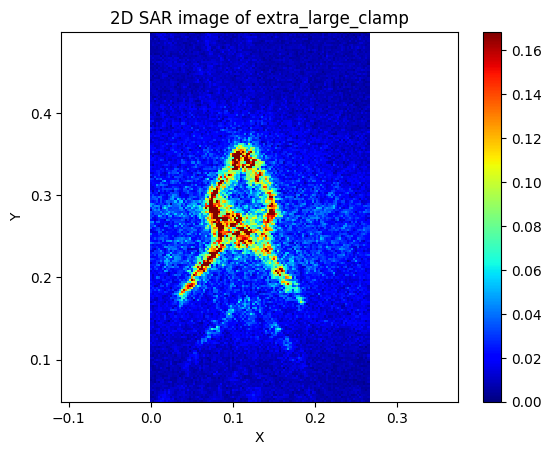

In [ ]:
########################
# Parameters to Change
projection_dim = 2 # Dimension to project: 0=X, 1=Y, 2=Z (typically use Z=vertical)
plot_all_slices = False # True to see all slices, False for averaged projection
########################

# Create visualizer object
visualizer = Visualizer()

print(f"Visualizing image projected along {['X', 'Y', 'Z'][projection_dim]} dimension")

# Plot the SAR image
# This will:
# 1. Take the magnitude of complex values
# 2. Project along the specified dimension (by averaging)
visualizer.plot_sar_image(
    image, 
    x_locs, 
    y_locs, 
    z_locs, 
    plot_dim=projection_dim, 
    normalization=None, 
    plot_all_slices=plot_all_slices, 
    obj_name=obj_name, 
    title=f'2D SAR image of {obj_name}'
)

import matplotlib.pyplot as plt
plt.show()

In [ ]:
#01_dataset_visualization.ipynb



# Simulating mmWave Images

In this tutorial, we will show you how to:
1. Simulate mmWave images with from different reflection types.
2. Combine resulting images to produce a final synthetic image.

To understand our simulation in more details, please check out our paper, section 5.

This tutorial assumes that you have followed the install steps in the README, and that you have downloaded sample data (using either setup.py or in Tutorial 1).

In [ ]:
import subprocess

# Simulating Different Reflection Types

Our simulation considers two types of reflections: specular (or mirror-like) reflections and edge reflections.

We first produce two different images assuming entirely specular or entirely edge reflections. To do so, we use the `run_simulation.sh` bash script in the `src/simulation` folder. You can use the following code block to run this simulation. To change parameters of the simulation (e.g., which object to simulate, the angle to simulate, etc.), please check out the documentation in `run_simulation.sh`.

***Note: This cell may take some time. You can skip this cell and use existing simulation data to learn how to visualize and combine simulation results***

In [ ]:
# Call the run_simulation.sh script.
# This may take some time. If you would just like to learn how to visualize and combine simulation results, you may skip this cell
root_path = utilities.get_root_path() # Returns a path to the root of the repository
subprocess.call("./run_simulation.sh", cwd=f'{root_path}/src/simulation/') # The run_simulation.sh script is expected to be called from the src/simulation folder

1

# Visualizing Simulation Results

The above code will produce two images: one for specular reflections and one for edge reflections. First, let us visualize each of these images separately.

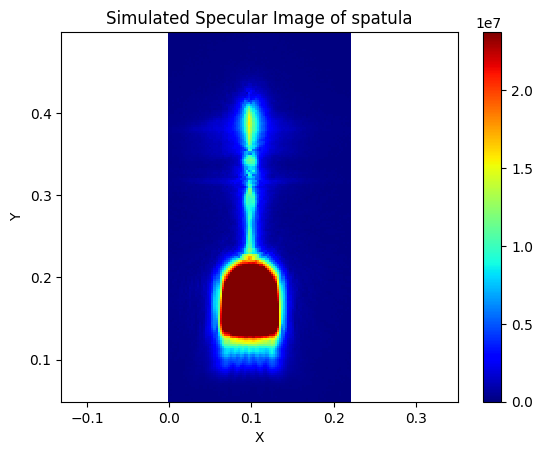

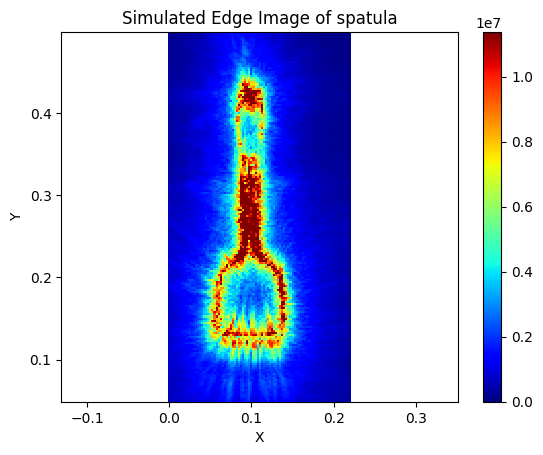

In [ ]:
########################
# Step 1: Parameters to Change
obj_id = '033'
obj_name = 'spatula'
########################

# Create generic loader and visualizer objects
loader = GenericLoader(obj_id, obj_name, is_sim=True, is_los=True, exp_num=None)
visualizer = Visualizer()

#  Load and plot the specular image
specular_image, (x_locs, y_locs, z_locs), antenna_locs = loader.load_image_file('77_ghz', background_subtraction=None, ext=utilities.load_param_json()['processing']['specular_extension'])
visualizer.plot_sar_image(specular_image, x_locs, y_locs, z_locs, plot_dim=2, normalization=None, plot_all_slices=False, obj_name=obj_name, title=f'Simulated Specular Image of {obj_name}')

# Load and plot the edge image
edge_image, (x_locs, y_locs, z_locs), antenna_locs = loader.load_image_file('77_ghz', background_subtraction=None, ext=utilities.load_param_json()['processing']['edges_extension'])
visualizer.plot_sar_image(edge_image, x_locs, y_locs, z_locs, plot_dim=2, normalization=None, plot_all_slices=False, obj_name=obj_name, title=f'Simulated Edge Image of {obj_name}')

## Combining Simulation Images

Next, we can combine our two images (i.e. specular simulation and edge simulation images) to form one final synthetic image. Recall from our paper that we can do so through a weighted sum of the two images. We can combine our images with random weighting to produce different synthetic images representing objects with different material properties. The following code visualizes multiple random combinations.

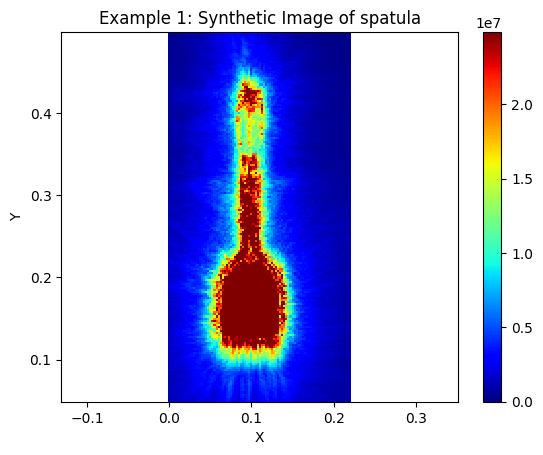

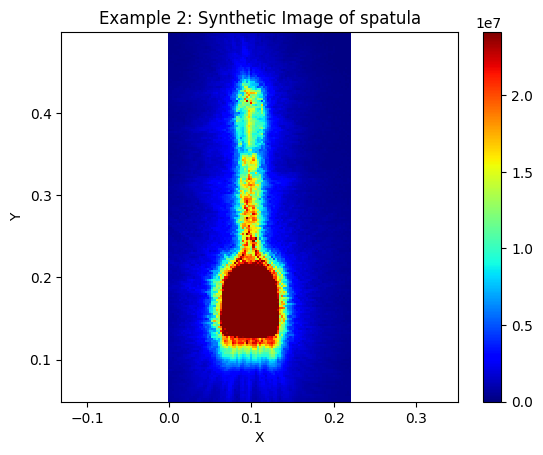

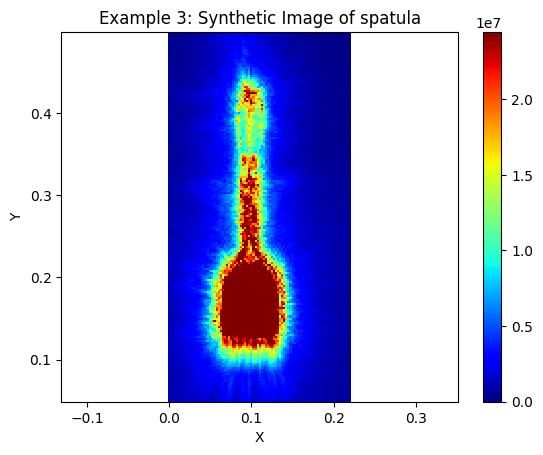

In [ ]:
num_images = 3 # Number of images to generate

for i in range(num_images):
    # Choose a random weighting
    weight = np.random.uniform(0, 2)

    # Combine images through weighted sum
    combined_image = specular_image + weight * edge_image

    # Visualize image
    visualizer.plot_sar_image(combined_image, x_locs, y_locs, z_locs, plot_dim=2, normalization=None, plot_all_slices=False, obj_name=obj_name, title=f'Example {i+1}: Synthetic Image of {obj_name}')